# Perhitungan Skor RNN-IDS

## Import All Necessary Libraries

In [29]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import math

## Load All the Data

In [30]:
df_pred = pd.read_csv('/home/apta/neuralnetwork-AD/rnn-apta/results/vector/retraining_floating_treatment_best2/part_1_Treatment_training_80_run5/result-lstm-tcp80-hl2-seq5-do0.2-oov1000-part_9_Treatment_testing_80.csv', 
                      names=['id', 'binary_error', 'b_mean', 'b_iqr', 'b_zscore', 'floatin_error', 'f_mean', 'f_iqr', 'f_zscore'])

df_truth = pd.read_csv('/home/apta/neuralnetwork-AD/rnn-apta/texts_retraining/texts_retraining_80/part_9_ground_truth.csv', 
                       encoding='ISO-8859-1')


In [31]:
df_pred.head()

,id,binary_error,b_mean,b_iqr,b_zscore,floatin_error,f_mean,f_iqr,f_zscore
0,192.168.10.16-38982-23.60.139.27-80-tcp,0.519767,1,1,1,67932.590643,1,1,1
1,192.168.10.9-21864-68.67.178.111-80-tcp,0.066692,0,1,1,8826.993048,0,0,0
2,192.168.10.14-54469-104.16.24.216-80-tcp,0.432671,1,1,1,52323.647321,1,1,1
3,192.168.10.16-39628-178.255.83.1-80-tcp,0.463134,1,1,1,52814.016317,1,1,1
4,192.168.10.14-51595-23.65.11.27-80-tcp,0.495238,1,1,1,62966.971084,1,1,1


In [32]:
df_truth.head()

,ID,Label
0,192.168.10.16-38982-23.60.139.27-80-tcp,BENIGN
1,192.168.10.9-21864-68.67.178.111-80-tcp,BENIGN
2,192.168.10.14-54469-104.16.24.216-80-tcp,BENIGN
3,192.168.10.16-39628-178.255.83.1-80-tcp,BENIGN
4,192.168.10.14-51595-23.65.11.27-80-tcp,BENIGN


In [33]:
df_pred[['b_iqr']].value_counts()

b_iqr
0        22913
1         6210
Name: count, dtype: int64

## Exploratory Data Analysis

In [34]:
df_pred[['b_iqr']].value_counts()

b_iqr
0        22913
1         6210
Name: count, dtype: int64

In [35]:
df_pred[['b_zscore']].value_counts()

b_zscore
0           22915
1            6208
Name: count, dtype: int64

In [36]:
df_truth.isnull().sum()

ID       0
Label    0
dtype: int64

## Data Pre-Processing

### Convert the type of the data

In [37]:
df_truth['Label'].head()

0    BENIGN
1    BENIGN
2    BENIGN
3    BENIGN
4    BENIGN
Name: Label, dtype: object

## Making Predictions

In [38]:
df_pred["id"]

0         192.168.10.16-38982-23.60.139.27-80-tcp
1         192.168.10.9-21864-68.67.178.111-80-tcp
2        192.168.10.14-54469-104.16.24.216-80-tcp
3         192.168.10.16-39628-178.255.83.1-80-tcp
4          192.168.10.14-51595-23.65.11.27-80-tcp
                           ...                   
29118      192.168.10.8-53898-178.255.83.1-80-tcp
29119      192.168.10.8-49916-172.217.11.3-80-tcp
29120     192.168.10.19-51032-23.61.187.27-80-tcp
29121      192.168.10.8-59579-52.5.149.245-80-tcp
29122      192.168.10.15-49898-23.37.43.27-80-tcp
Name: id, Length: 29123, dtype: object

In [39]:
df_truth["ID"]

# df_truth[df_truth["id"] == "192.168.10.50-21-172.16.0.1-52120-tcp"]

0         192.168.10.16-38982-23.60.139.27-80-tcp
1         192.168.10.9-21864-68.67.178.111-80-tcp
2        192.168.10.14-54469-104.16.24.216-80-tcp
3         192.168.10.16-39628-178.255.83.1-80-tcp
4          192.168.10.14-51595-23.65.11.27-80-tcp
                           ...                   
29118      192.168.10.8-53898-178.255.83.1-80-tcp
29119      192.168.10.8-49916-172.217.11.3-80-tcp
29120     192.168.10.19-51032-23.61.187.27-80-tcp
29121      192.168.10.8-59579-52.5.149.245-80-tcp
29122      192.168.10.15-49898-23.37.43.27-80-tcp
Name: ID, Length: 29123, dtype: object

In [40]:
# Convert 'Label' column to numeric: BENIGN -> 0, other -> 1
df_truth['Label'] = df_truth['Label'].apply(lambda x: 0 if x == 'BENIGN' else 1)

In [41]:
# df_pred["Label"] = np.where(df_pred["id"].isin(df_truth["id"]), 1, 0)

# Rename 'ID' to 'id' in df_truth
df_truth = df_truth.rename(columns={'ID': 'id'})

# Now merge and drop rows where the label is missing
df_pred = df_pred.merge(df_truth[['id', 'Label']], on='id', how='left')
df_pred = df_pred.dropna(subset=['Label'])


In [42]:
df_pred[df_pred['Label']==1]

,id,binary_error,b_mean,b_iqr,b_zscore,floatin_error,f_mean,f_iqr,f_zscore,Label
5911,172.16.0.1-45370-192.168.10.50-80-tcp,0.016393,0,0,0,194.055402,0,0,0,1
5912,172.16.0.1-45072-192.168.10.50-80-tcp,0.047187,0,0,0,4854.452381,0,0,0,1
5913,172.16.0.1-45072-192.168.10.50-80-tcp,0.047187,0,0,0,4854.452381,0,0,0,1
5914,172.16.0.1-59114-192.168.10.50-80-tcp,0.028986,0,0,0,3907.361765,0,0,0,1
5915,172.16.0.1-59114-192.168.10.50-80-tcp,0.028986,0,0,0,3907.361765,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
67481,172.16.0.1-39942-192.168.10.50-80-tcp,0.025496,0,0,0,1075.810345,0,0,0,1
67482,172.16.0.1-58176-192.168.10.50-80-tcp,0.028213,0,0,0,4464.289809,0,0,0,1
67483,172.16.0.1-58176-192.168.10.50-80-tcp,0.028213,0,0,0,4464.289809,0,0,0,1
67484,172.16.0.1-58176-192.168.10.50-80-tcp,0.028213,0,0,0,4464.289809,0,0,0,1


In [43]:
df_pred[df_pred['Label']==0]

,id,binary_error,b_mean,b_iqr,b_zscore,floatin_error,f_mean,f_iqr,f_zscore,Label
0,192.168.10.16-38982-23.60.139.27-80-tcp,0.519767,1,1,1,67932.590643,1,1,1,0
1,192.168.10.9-21864-68.67.178.111-80-tcp,0.066692,0,1,1,8826.993048,0,0,0,0
2,192.168.10.14-54469-104.16.24.216-80-tcp,0.432671,1,1,1,52323.647321,1,1,1,0
3,192.168.10.16-39628-178.255.83.1-80-tcp,0.463134,1,1,1,52814.016317,1,1,1,0
4,192.168.10.14-51595-23.65.11.27-80-tcp,0.495238,1,1,1,62966.971084,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...
70830,192.168.10.8-53898-178.255.83.1-80-tcp,0.439815,1,1,1,54417.826698,1,1,1,0
70831,192.168.10.8-49916-172.217.11.3-80-tcp,0.320399,1,1,1,38940.283166,1,1,1,0
70832,192.168.10.19-51032-23.61.187.27-80-tcp,0.515116,1,1,1,70083.498246,1,1,1,0
70833,192.168.10.8-59579-52.5.149.245-80-tcp,0.339623,1,1,1,50903.504237,1,1,1,0


In [44]:
df_pred

,id,binary_error,b_mean,b_iqr,b_zscore,floatin_error,f_mean,f_iqr,f_zscore,Label
0,192.168.10.16-38982-23.60.139.27-80-tcp,0.519767,1,1,1,67932.590643,1,1,1,0
1,192.168.10.9-21864-68.67.178.111-80-tcp,0.066692,0,1,1,8826.993048,0,0,0,0
2,192.168.10.14-54469-104.16.24.216-80-tcp,0.432671,1,1,1,52323.647321,1,1,1,0
3,192.168.10.16-39628-178.255.83.1-80-tcp,0.463134,1,1,1,52814.016317,1,1,1,0
4,192.168.10.14-51595-23.65.11.27-80-tcp,0.495238,1,1,1,62966.971084,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...
70830,192.168.10.8-53898-178.255.83.1-80-tcp,0.439815,1,1,1,54417.826698,1,1,1,0
70831,192.168.10.8-49916-172.217.11.3-80-tcp,0.320399,1,1,1,38940.283166,1,1,1,0
70832,192.168.10.19-51032-23.61.187.27-80-tcp,0.515116,1,1,1,70083.498246,1,1,1,0
70833,192.168.10.8-59579-52.5.149.245-80-tcp,0.339623,1,1,1,50903.504237,1,1,1,0


In [45]:
df_pred[['Label']].value_counts()

Label
1        61575
0         9260
Name: count, dtype: int64

In [46]:
import os
# Define the directory path
dir_path = '../mcnemar/ftp'

# Check if the directory exists, and if not, create it
if not os.path.exists(dir_path):
    os.makedirs(dir_path)

df_temp = df_pred[['id', 'b_mean','b_iqr', 'b_zscore', 'f_zscore', 'f_mean','f_iqr' ]]
df_temp.to_csv(os.path.join(dir_path, 'pred_0.0.csv'))

## Calculating Score

In [47]:
threshold = ['b_mean', 'b_iqr', 'b_zscore']
threshold_2 = ['f_mean', 'f_iqr', 'f_zscore']

methods = ['binary', 'floating']

In [48]:
df_pred[['b_zscore']]

,b_zscore
0,1
1,1
2,1
3,1
4,1
...,...
70830,1
70831,1
70832,1
70833,1


### Detection Rate

In [49]:
from sklearn.metrics import recall_score

score = dict()
score['Detection Rate'] = dict()
for method in methods:
    if method == 'binary':
        for i in threshold:
            acc = recall_score(df_pred['Label'], df_pred[i])
            score['Detection Rate'][i] = acc
            print(f'Recall-Binary-{i}: {acc}')
    else:
        for i in threshold_2:
            acc = recall_score(df_pred['Label'], df_pred[i])
            score['Detection Rate'][i] = acc
            print(f'Recall-Floating-{i}: {acc}')  

Recall-Binary-b_mean: 0.000146163215590743
Recall-Binary-b_iqr: 0.05651644336175396
Recall-Binary-b_zscore: 0.05651644336175396
Recall-Floating-f_mean: 9.7442143727162e-05
Recall-Floating-f_iqr: 0.009305724725943971
Recall-Floating-f_zscore: 0.010442549736094195


### Confussion Matrix

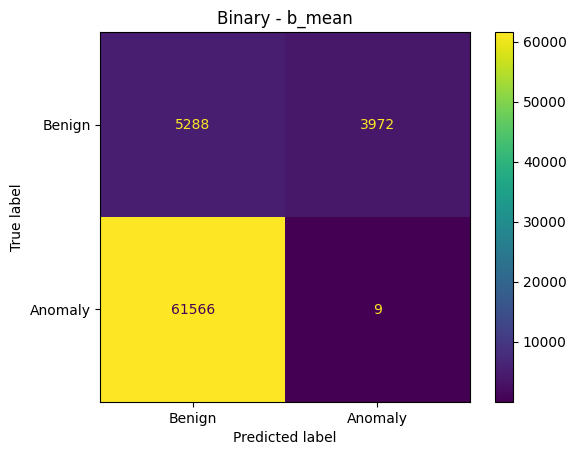

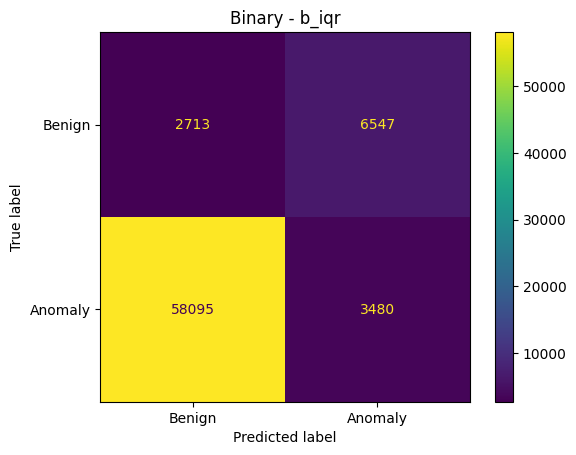

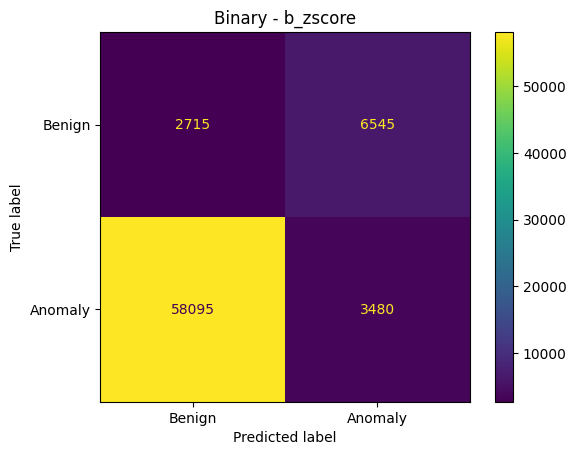

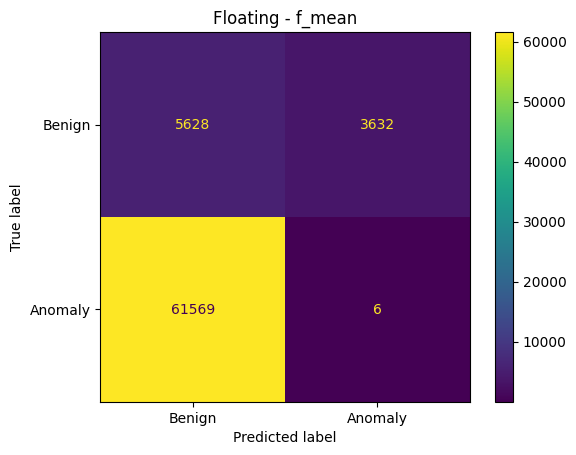

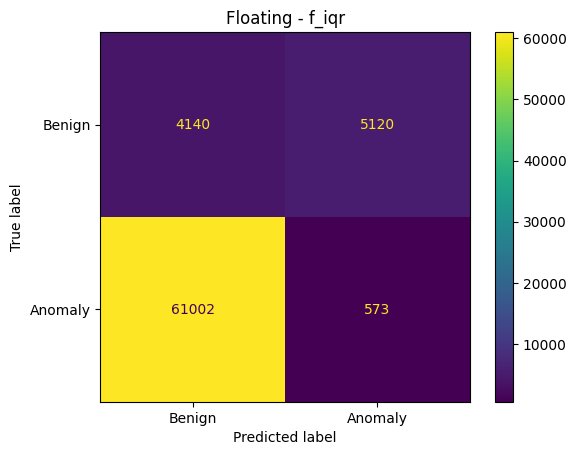

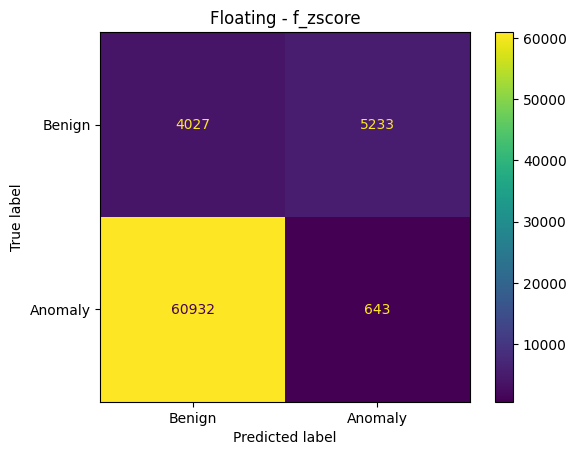

In [50]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

for method in methods:
    if method == 'binary':
        for i in threshold:
            conf_matrix = confusion_matrix(df_pred['Label'], df_pred[i])
            cm_display = ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels=['Benign', 'Anomaly'])
            cm_display.plot()
            plt.title(f'Binary - {i.strip()}')
            plt.show()
    else:
        for i in threshold_2:
            conf_matrix = confusion_matrix(df_pred['Label'], df_pred[i])
            cm_display = ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels=['Benign', 'Anomaly'])
            cm_display.plot()
            plt.title(f'Floating - {i.strip()}')
            plt.show()


### F2-Score

In [51]:
score['F2 Score'] = dict()
for method in methods:
    if method == 'binary':
        for i in threshold:
            tn, fp, fn, tp = confusion_matrix(df_pred['Label'], df_pred[i]).ravel()
            f2 = ((1+2**2)*tp)/((1+2**2)*tp+2**2*fn+fp)
            score['F2 Score'][i] = f2
            print(f'F2-Binary-{i}: {f2}')
    else:
        for i in threshold_2:
            tn, fp, fn, tp = confusion_matrix(df_pred['Label'], df_pred[i]).ravel()
            f2 = ((1+2**2)*tp)/((1+2**2)*tp+2**2*fn+fp)
            score['F2 Score'][i] = f2
            print(f'F2-Floating-{i}: {f2}')

F2-Binary-b_mean: 0.00017979790715236076
F2-Binary-b_iqr: 0.06788204129880972
F2-Binary-b_zscore: 0.06788257095484249
F2-Floating-f_mean: 0.00012002976738231081
F2-Floating-f_iqr: 0.011369363434698583
F2-Floating-f_zscore: 0.012749032421800647


### FPR Score

In [52]:
score['FPR Score'] = dict()
for method in methods:
    if method == 'binary':
        for i in threshold:
            tn, fp, fn, tp = confusion_matrix(df_pred['Label'], df_pred[i]).ravel()
            fpr = fp/(fp+tn)
            score['FPR Score'][i] = fpr
            print(f'FPR-Binary-{i}: {fpr}')
    else:
        for i in threshold_2:
            tn, fp, fn, tp = confusion_matrix(df_pred['Label'], df_pred[i]).ravel()
            fpr = fp/(fp+tn)
            score['FPR Score'][i] = fpr
            print(f'FPR-Floating-{i}: {fpr}')

FPR-Binary-b_mean: 0.4289416846652268
FPR-Binary-b_iqr: 0.7070194384449244
FPR-Binary-b_zscore: 0.7068034557235421
FPR-Floating-f_mean: 0.39222462203023756
FPR-Floating-f_iqr: 0.5529157667386609
FPR-Floating-f_zscore: 0.5651187904967603


In [53]:
from sklearn.metrics import accuracy_score

score['Accuracy Score'] = dict()
for method in methods:
    if method == 'binary':
        for i in threshold:
            acc = accuracy_score(df_pred['Label'], df_pred[i])
            score['Accuracy Score'][i] = acc
            print(f'Accuracy-Binary-{i}: {acc}')
    else:
        for i in threshold_2:
            acc = accuracy_score(df_pred['Label'], df_pred[i])
            score['Accuracy Score'][i] = acc
            print(f'Accuracy-Floating-{i}: {acc}')  

Accuracy-Binary-b_mean: 0.07477941695489518
Accuracy-Binary-b_iqr: 0.08742853109338604
Accuracy-Binary-b_zscore: 0.08745676572315945
Accuracy-Floating-f_mean: 0.07953695207171596
Accuracy-Floating-f_iqr: 0.06653490506105739
Accuracy-Floating-f_zscore: 0.06592786052092892


In [54]:
df_score = pd.DataFrame.from_dict(score)
df_score

,Detection Rate,F2 Score,FPR Score,Accuracy Score
b_mean,0.000146,0.000180,0.428942,0.074779
b_iqr,0.056516,0.067882,0.707019,0.087429
b_zscore,0.056516,0.067883,0.706803,0.087457
f_mean,0.000097,0.000120,0.392225,0.079537
f_iqr,0.009306,0.011369,0.552916,0.066535
f_zscore,0.010443,0.012749,0.565119,0.065928


In [55]:
df_score.to_excel('score_ftp_0.0.xlsx')

In [56]:
# %pip install openpyxl